#Relatório 2

Nome: Louise Queiroz da Silva Bezerra

Matrícula: 20200742


##Bibliotecas

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

##Métodos

##Eliminação de Gauss

In [ ]:
def eliminacaoGauss(A, b):
  n = len(b)
  x = np.zeros(n)
  det = 1
  info = 0
  for j in range(n):
    #escolha do elemento pivô
    p = j
    aMax = abs(A[j][j])
    for k in range(j+1, n):
      if(abs(A[k][j]) > aMax):
        aMax = A[k][j]
        p = k
    if p != j:
      for k in range(n):
        t = A[j][k]
        A[j][k] = A[p][k]
        A[p][k] = t
      t = b[j]
      b[j] = b[p]
      b[p] = t
      det =  det * (-1)
    det = det * A[j][j]
    #eliminação de gauss
    if abs(A[j][j]) != 0:
      r = 1 /A[j][j]
      for i in range(j + 1, n):
        mult = A[i][j] * r
        A[i][j] = 0
        for k in range(j + 1, n):
          A[i][k] = A[i][k] - (mult * A[j][k])
        b[i] = b[i] - (mult * b[j])
    else:
      if info == 0:
        info = j
    det = det * A[n-1][ n-1]
    if (info == 0 and abs(A[n-1, n-1])) == 0:
      info = n
  x = np.linalg.solve(A, b)

  return x, det, info



###Fatoração LU

In [ ]:
def fatLU(A, b):
  #A = U + L - I
  m = A.shape[0]
  L = np.eye(m)
  #"renomeando" a matriz A
  U = np.copy(A)
  info = 0

  for j in range(m-1):
    if abs(U[j][j]) != 0:
      r = 1 / U[j][j]
      for i in range (j+1, m):
        L[i][j] = U[i][j] * r
        U[i][j] = 0
        for k in range(j+1, m):
          U[i][k] = U[i][k] - L[i][j] * U[j][k]
        #b[i] = b[i] - L[i][j] * b[j]
    else:
      if info == 0:
        info = j
  L = np.around(L, m)
  U = np.around (U, m)

  ##L.y = b
  y = np.linalg.solve(L, b)
  #U.x = y
  x = np.linalg.solve(U, y)
  #x = np.around(x, m)
  formatted_x = ["{:.3f}".format(x) if abs(x) > 1e-10 else "0.000" for x in x]

  return L, U, formatted_x

###Fatoração Cholesky

In [ ]:
def cholesky(A, b):
    n = len(A)
    G = np.zeros((n, n))

    det = 1
    info = 0

    for j in range(n):
        soma = 0
        for k in range(j):
            soma += G[j][k] * G[j][k]
        t = A[j][j] - soma

        if t > 0:
            G[j][j] = np.sqrt(t)
            r = 1 / G[j][j]
            det *= t
        else:
            info = j
            print("A matriz não é definida positiva")
            return None, None, info

        for i in range(j + 1, n):
            soma = 0
            for k in range(j):
                soma += G[i][k] * G[j][k]
            G[i][j] = (A[i][j] - soma) * r

    y = np.linalg.solve(G, b)
    x = np.linalg.solve(G.T, y)

    for i in range (0, len(x)):
      print("x[%d] ="% (i), round(x[i], 4))
    #print("Iterações: ", iter)

    return x, det, info

###Gauss-Jacobi

In [ ]:
def gaussJacobi(A, b, toler, iterMax):
  n = np.shape(A)[0]
  x = np.zeros(n)
  v = np.zeros(n)
  for i in range(0, n):
    x[i] = b[i] / A[i][i]
  iter = 0
  while True:
    iter += 1
    for i in range(n):
      soma = 0
      for j in range (n):
        if i!=j:
          soma += A[i][j] * x[j]
      v[i] = (b[i] - soma) / A[i][i]
    normaNum = 0
    normaDen = 0

    for i in range (n):
      t = abs(v[i] - x[i])
      if t > normaNum:
        normaNum = t
      if abs(v[i]) > normaDen:
        normaDen = abs(v[i])
      x[i] = v[i]
    normaRel = normaNum/normaDen
    #print(iter,x,normaRel)
    #teste convergência
    if normaRel <= toler or iter >= iterMax:
      break;
  if normaRel <= toler:
    #convergiu
    info = 0
  else:
    #não convergiu
    info = 1
  return x, iter, info


###Gauss-Seidel

In [ ]:
def gaussSeidel(A,b,toler,iterMax):
  n = np.shape(A)[0]
  x = np.zeros(n)
  v = np.zeros(n)
  for i in range(0,n):
    x[i] = b[i]/A[i][i]
  iter = 0
  while True:
    iter += 1
    normaNum = 0
    normaDen = 0
    for i in range(0,n):
      soma = 0
      for j in range(0,n):
        if i!=j:
          soma += A[i][j] * x[j]
      v[i] = x[i]
      x[i] = (b[i] - soma) /A[i][i]
      t = abs(v[i] - x[i])
      if (t> normaNum):
        normaNum = t
      if (abs(x[i]) > normaDen):
        normaDen = abs(x[i])
    normaRel = normaNum/normaDen
    #print(iter,x,normaDen)
    #teste de convergencia
    if (normaRel <= toler or iter>= iterMax):
      break
  if normaRel <= toler:
    info = 0
  else:
    #não convergiu
    info = 1
  return x, iter, info

##Exercícios

1) Considere os seguintes sistemas:
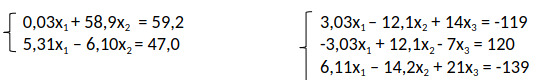

a) Resolva os sistemas acima usando o Métodos Direto de Eliminação de Gauss com
Pivotamento e operações aritméticas com aproximação de três dígitos por
arredondamento.

b) Verifique se os sistemas acima são convergente se aplicarmos os Métodos Iterativos
de Gauss-Jacobi e Gauss-Seidel. Justifique sua resposta

In [ ]:
#LETRA A
A = np.array([[0.03, 58.9], [5.31, -6.10]], dtype=float)
b = np.array([59.2, 47], dtype=float)

C = np.array([[3.03, -12.1, 14], [-3.03, 12.1, -7], [6.11, -14.2, 21]], dtype=float)
d = np.array([-119, 120, -139], dtype=float)

x, det, info = eliminacaoGauss(A,b)
print("Primeiro sistema:\n")
for i in range (0, len(x)):
  print("x[%d] ="% (i), round(x[i], 3))

x, det, info = eliminacaoGauss(C,d)
print("Segundo sistema:\n")
for i in range (0, len(x)):
  print("x[%d] ="% (i), round(x[i], 3))

Primeiro sistema:

x[0] = 10.0
x[1] = 1.0
Segundo sistema:

x[0] = 0.0
x[1] = 10.0
x[2] = 0.143


In [ ]:
#LETRA B

print("Primeiro sistema:\n")
#Gauss-Jacobi
x, iter, info = gaussJacobi(A, b, 0.001, 500)
if info == 1:
  print("Não convergiu no método Gauss-Jacobi\n")
else:
  print("Convergiu no método Gauss-Jacobi")
#Gauss-Seidel
x, iter, info = gaussSeidel(A,b,0.001,500)
if info == 1:
  print("Não convergeu no método Gauss-Seidel")
else:
  print("Convergiu no método Gauss-Seidel\n")


print("Segundo sistema:\n")
#Gauss-Jacobi
x, iter, info = gaussJacobi(C, d, 0.001, 500)
if info == 1:
  print("Não convergiu no método Gauss-Jacobi\n")
else:
  print("Convergiu no método Gauss-Jacobi")
#Gauss-Seidel
x, iter, info = gaussSeidel(C,d,0.001,500)
if info == 1:
  print("Não convergeu no método Gauss-Seidel")
else:
  print("Convergiu no método Gauss-Seidel\n")

Primeiro sistema:

Convergiu no método Gauss-Jacobi
Convergiu no método Gauss-Seidel

Segundo sistema:

Convergiu no método Gauss-Jacobi
Convergiu no método Gauss-Seidel



2) Uma indústria produz 4 tipo de produtos (1), (2), (3) e (4), os quais são processados
e produzidos no decorrer da semana. Para produção de cada unidade desses
produtos necessita-se de 4 diferentes tipos de matéria-prima (A), (B), (C) e (D),
conforme tabela dada:

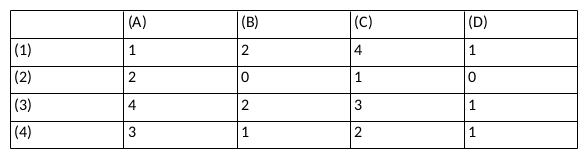

Por exemplo, para produzir uma unidade de (1) precisa-se de 1 unidade de A, 2
unidades de (B), 4 unidades de (C) e 1 unidade de (D).

A indústria possui disponível em estoque 16, 13, 27 e 7 unidades de (A), (B), (C) e (D),
respectivamente. Quantas unidades de cada produto podem ser produzidas?

Formule um modelo matemático, resolva-o usando o Método Direto de Fatoração LU e
analise os resultados obtidos.

In [ ]:
A = np.array([[1,2,4,1], [2,0,1,0], [4,2,3,1], [3,1,2,1]], dtype=float)
b = np.array([16,13,27,7], dtype=float)

L, U, x = fatLU(A,b)
for i in range (0, len(x)):
  print("x[%d] ="% (i),x[i])

x[0] = 4.800
x[1] = 11.800
x[2] = 3.400
x[3] = -26.000


O resultado não retornou muito linear, o x3 retornou um número negativo, logo não ficou possível de avaliar realmente quantas unidades podem ser produzidas. Porém com base no resultado de outros valores, com x = 0 é possível 4 unidades, x=1 11 unidades e x=2 3 uniades.

3) Considere o sistema:
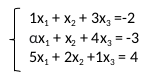

Para os valores de α:
a) A matriz A pode ser decomposta em L.U? Justifique.

b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.

c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss.

In [ ]:
#LETRA A
print("Alfa = 1")
#alfa = 1
A1 = np.array([[1]])
A2 = np.array([[1,1], [1,1]])
A3 = np.array([[1,1,3], [1,1,4], [5,2,1]])

print("Determinante - 1: " + str(np.linalg.det(A1)))
print("Determinante - 2: " + str(np.linalg.det(A2)))
print("Determinante - 3: " + str(np.linalg.det(A3)))
print("Alfa = 2")
#alfa = 2
A1 = np.array([[1]])
A2 = np.array([[1,1], [2,1]])
A3 = np.array([[1,1,3], [2,1,4], [5,2,1]])

print("Determinante - 1: " + str(np.linalg.det(A1)))
print("Determinante - 2: " + str(np.linalg.det(A2)))
print("Determinante - 3: " + str(np.linalg.det(A3)))
#alfa = 2
print("Alfa = 3")
A1 = np.array([[1]])
A2 = np.array([[1,1], [3,1]])
A3 = np.array([[1,1,3], [3,1,4], [5,2,1]])

print("Determinante - 1: " + str(np.linalg.det(A1)))
print("Determinante - 2: " + str(np.linalg.det(A2)))
print("Determinante - 3: " + str(np.linalg.det(A3)))

Alfa = 1
Determinante - 1: 1.0
Determinante - 2: 0.0
Determinante - 3: 2.9999999999999996
Alfa = 2
Determinante - 1: 1.0
Determinante - 2: -1.0
Determinante - 3: 7.999999999999998
Alfa = 3
Determinante - 1: 1.0
Determinante - 2: -2.0000000000000004
Determinante - 3: 13.0


Para usar a fatoração LU, os determinantes das submatrizes principais precisam ser não nulos. Quando alfa é 1, o determinante da segunda submatriz é zero, impedindo a aplicação do método. Contudo, quando alfa é maior que 1, como 2 ou 3, as propriedades da matriz mudam o suficiente para permitir a fatoração LU e resolver o sistema linear.

In [ ]:
#LETRA B
#simétrica e positiva definida
A = np.array([[1, 1, 3], [1, 1, 4], [5,2,1]])
b = np.array([-2,-3, 4])
simetrica = np.array_equal(A, A.T)
valores = np.linalg.eigvals(A)
is_positive_definite = np.all(valores > 0)
if simetrica == True and valores == True:
  print("Pode ser resolvido por Fatoração Cholesky.")
else:
  print("Não pode ser resolvido por Fatoração Cholesky.")

Não pode ser resolvido por Fatoração Cholesky.


O sistema com α = 1 não é viável para resolução por fatoração Cholesky, já que essa técnica requer uma matriz simétrica e positiva definida. Quando α varia de 1 até 10, ainda não é possível alcançar a resolução do sistema utilizando essa técnica.

In [ ]:
#LETRA C

A = np.array([[1, 1, 3], [1, 1, 4], [5, 2, 1]], dtype=float)
b = np.array([-2, -3, 4], dtype=float)
x, det, info = eliminacaoGauss (A,b)
for i in range (0, len(x)):
  print("x[%d] ="% (i), round(x[i], 4))

x[0] = 1.0
x[1] = 0.0
x[2] = -1.0


4) Uma equipe de três paraquedistas ligados por uma corda de peso desprezável é
lançada em queda livre a uma velocidade v = 5 m/s.

Considere os seguintes dados: 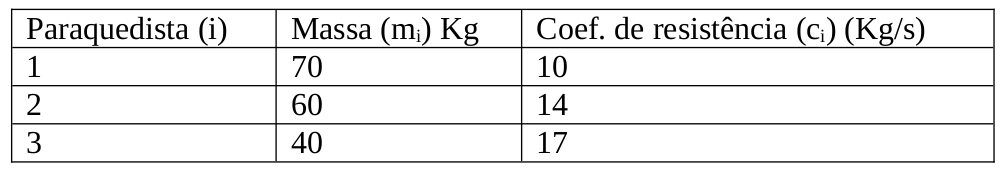

O sistema linear resultante permite calcular a tensão em cada secção da corda (R e T ) e
a aceleração da equipe (a). 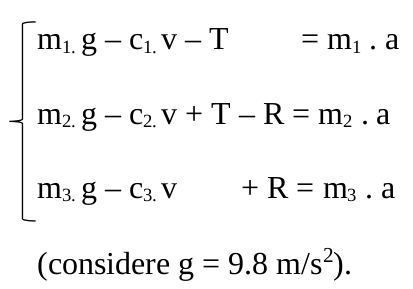



O que poderia dizer acerca da convergência do método iterativo de Gauss-Seidel
quando aplicado ao sistema? Justifique.

In [ ]:
g = 9.8
v = 5
A = np.array([[1,70,10], [2,60,14], [3,40,17]])
m = A[:, 1]
c = A[:, 2]

b = np.array([
    m[0] * g - c[0] * v,
    m[1] * g - c[1] * v,
    m[2] * g - c[2] * v
])


x, iter, info = gaussSeidel(A, b, 0.001, 500)

if info == 0:
  print("Convergiu")
else:
  print("Não convergiu")

Não convergiu


In [ ]:
#ANÁLISE DO RESULTADO
def diagonalDom(A):
    linhas, colunas = A.shape
    for i in range(linhas):
        diagonal = abs(A[i, i])
        soma_fora_diagonal = np.sum(abs(A[i, :])) - diagonal
        if diagonal <= soma_fora_diagonal:
            return False
    return True

bol = diagonalDom(A)
print(bol)

False


O critério de convergência do método de Gauss-Seidel demanda que a matriz seja diagonalmente dominante. Ao analisar a função apresentada, é evidente que a matriz A não atende a esse critério, o que impede a resolução do sistema utilizando o método de Gauss-Seidel.

5) Resolva o seguinte sistema de equações :
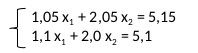

a) Graficamente.

b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.

c) Por Eliminação de Gauss com Pivotamento Parcial, mas com três algarismos
significativos, utilizando arredondamento.

d) Justifique os resultados obtidos.

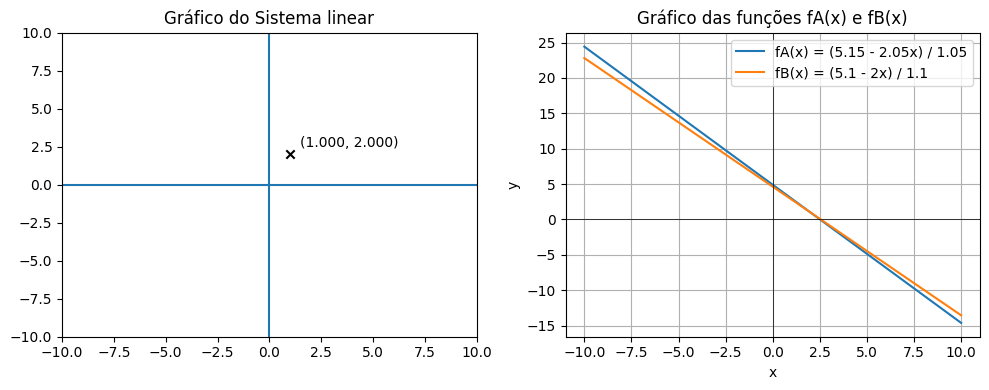

In [ ]:
A = np.array([[1.05, 2.05], [1.1, 2]], dtype=float)
b = np.array([5.15, 5.1], dtype=float)
c = np.linalg.solve(A, b)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_xlim((-10, 10))
axs[0].set_ylim((-10, 10))
axs[0].plot([-10, 10], [0, 0], color='C0')
axs[0].plot([0, 0], [-10, 10], color='C0')
axs[0].scatter(c[0], c[1], marker='x', color='black')
axs[0].annotate('({:0.3f}, {:0.3f})'.format(c[0], c[1]), c + 0.5)
axs[0].set_title('Gráfico do Sistema linear')

fA = lambda x: (5.15 - 2.05 * x) / 1.05
fB = lambda x: (5.1 - 2 * x) / 1.1

x_values = np.linspace(-10, 10, 100)
y_values_A = fA(x_values)
y_values_B = fB(x_values)

axs[1].plot(x_values, y_values_A, label='fA(x) = (5.15 - 2.05x) / 1.05')
axs[1].plot(x_values, y_values_B, label='fB(x) = (5.1 - 2x) / 1.1')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Gráfico das funções fA(x) e fB(x)')
axs[1].legend()
axs[1].grid(True)
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
#LETRA B

#Pivoteamento parcial
A = np.array([[1.05, 2.05], [1.1, 2]], dtype=float)
b = np.array([5.15, 5.1], dtype=float)
x, det, info = eliminacaoGauss(A,b)
for i in range (0, len(x)):
  print("x[%d] ="% (i), x[i])

x[0] = 0.9999999999999883
x[1] = 2.000000000000006


In [ ]:
#LETRA B
#Arredondamento
x, det, info = eliminacaoGauss(A,b)
for i in range (0, len(x)):
  print("x[%d] ="% (i), round(x[i], 3))

x[0] = 1.0
x[1] = 2.0


C) Os resultados foram comparáveis, porém, o primeiro conjunto de valores exatos ofereceu uma precisão mais elevada, evidenciada pelo maior número de casas decimais quando comparado ao segundo conjunto. Além disso, é perceptível que o gráfico também refletiu a influência do arredondamento, similar ao que foi observado na situação descrita na letra B. Esses resultados ressaltam que, em situações com arredondamentos muito próximos, a prática de arredondar pode contribuir para uma maior clareza nos resultados obtidos.